In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv('Churn_Modelling.csv') 

In [5]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [7]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
data.fillna(method='ffill', inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_6076\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [11]:
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')

In [13]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# preprocessing
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['category']).columns.tolist()

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [25]:
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=100))])

In [27]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))])


In [29]:
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [31]:
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

In [33]:
pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)

In [35]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Logistic Regression Accuracy: 0.808
Random Forest Accuracy: 0.8575
Gradient Boosting Accuracy: 0.869


In [45]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_lr)
print(conf_matrix_rf)
print(conf_matrix_gb)

[[1540   53]
 [ 331   76]]
[[1538   55]
 [ 230  177]]
[[1537   56]
 [ 206  201]]


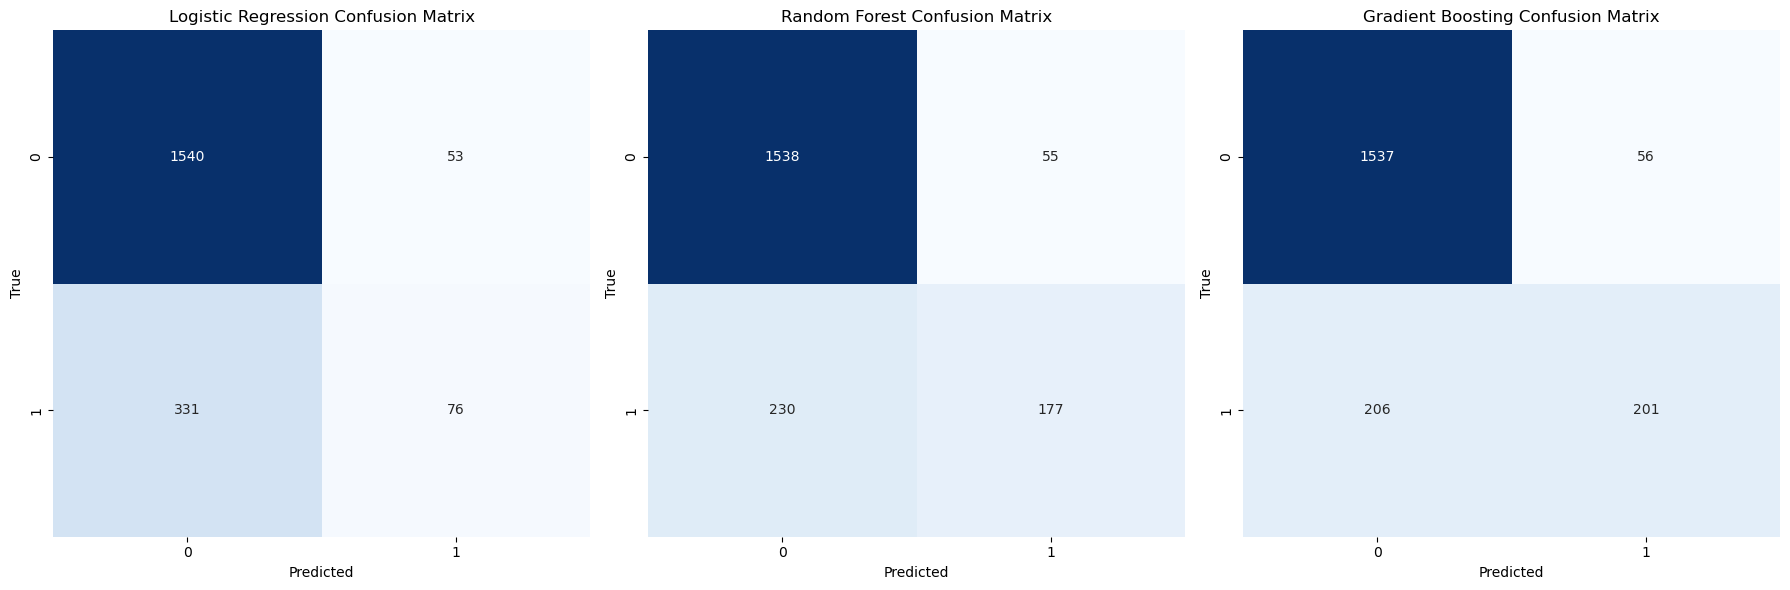

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', ax=axes[0], cmap="Blues", cbar=False)
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[1], cmap="Blues", cbar=False)
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', ax=axes[2], cmap="Blues", cbar=False)
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

In [55]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.61       407

    accuracy                           0.87      2000
   m